# Business Problem: 
* A new cost per click method has been introduced by Facebook. This new method is called "Maximum bidding".
* Besides a method called "Average bidding" already exists. Average cost bidding allows you to tell us what you want your average cost per result to be, 
* while maximum cost bidding is the maximum amount you're willing to pay for any given result. Our client bombabomba.com wants to know whether
* "Maximum bidding" leads to more purchase than "average bidding" or not. 
* An A/B test has been performed for the last 1 month. This test will be analyzed to see if new method provides a different result in purchases than the old one.

### Explaining variables
* Impression: Number of times advertisement has been viewed
* Click: Number of click after advertisement has been viewed
* Purchase: Number of product purchase after clicking on advertisement
* Earning: Money gained after advertisement based purchases

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# * What's CPC? 
# Cost-per-click (CPC) bidding means that you pay for each click on your ads. 


# * What's Maximum CPC method?
# For CPC bidding campaigns, you set a maximum cost-per-click bid - or simply "max. CPC" - that's the highest amount that 
# you're willing to pay for a click on your ad (unless you're setting bid adjustments, or using Enhanced CPC).

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# control_df represents the "maximum bidding" method 
# test_df represents the "average_bidding" method

In [4]:
control_df=pd.read_excel(r"C:\Users\ONUR\ab_testing.xlsx",sheet_name=0)
control_df.head(2)

,Impression,Click,Purchase,Earning
0,82529.46,6090.08,665.21,2311.28
1,98050.45,3382.86,315.08,1742.81


In [5]:
test_df=pd.read_excel(r"C:\Users\ONUR\ab_testing.xlsx",sheet_name=1)
test_df.head(2)

,Impression,Click,Purchase,Earning
0,120103.50,3216.55,702.16,1939.61
1,134775.94,3635.08,834.05,2929.41


### Analysis of both method together

In [6]:
control_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00,101711.45,20302.16,45475.94,85726.69,99790.70,115212.82,147539.34
Click,40.00,5100.66,1329.99,2189.75,4124.30,5001.22,5923.80,7959.13
Purchase,40.00,550.89,134.11,267.03,470.10,531.21,637.96,801.80
Earning,40.00,1908.57,302.92,1253.99,1685.85,1975.16,2119.80,2497.30


In [7]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00,120512.41,18807.45,79033.83,112691.97,119291.30,132050.58,158605.92
Click,40.00,3967.55,923.10,1836.63,3376.82,3931.36,4660.50,6019.70
Purchase,40.00,582.11,161.15,311.63,444.63,551.36,699.86,889.91
Earning,40.00,2514.89,282.73,1939.61,2280.54,2544.67,2761.55,3171.49


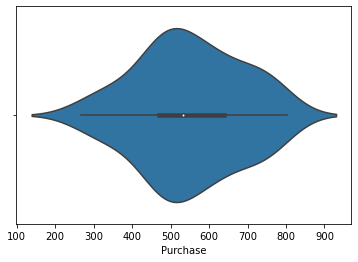

In [8]:
sns.violinplot(control_df["Purchase"])

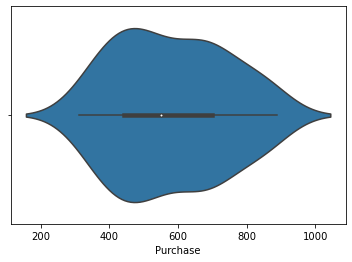

In [9]:
sns.violinplot(test_df["Purchase"])

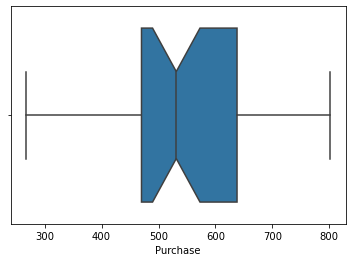

In [10]:
sns.boxplot(control_df["Purchase"],notch=True)

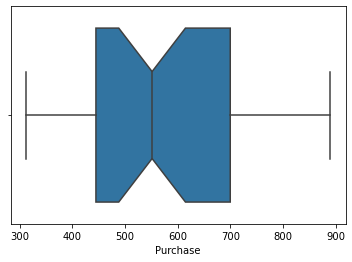

In [11]:
sns.boxplot(test_df["Purchase"],notch=True)

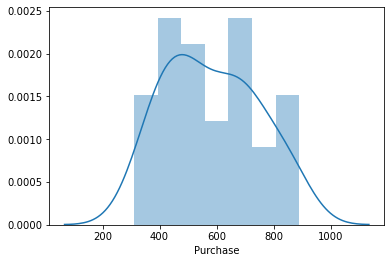

In [12]:
sns.distplot(test_df["Purchase"],bins=7)

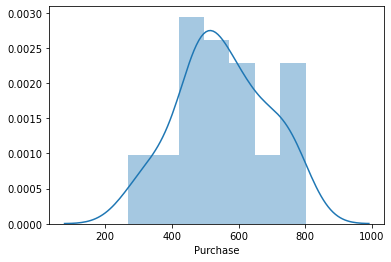

In [13]:
sns.distplot(control_df["Purchase"],bins=7)

In [14]:
control_df.columns=[col+"_Control" for col in control_df.columns]
control_df.head()

,Impression_Control,Click_Control,Purchase_Control,Earning_Control
0,82529.46,6090.08,665.21,2311.28
1,98050.45,3382.86,315.08,1742.81
2,82696.02,4167.97,458.08,1797.83
3,109914.40,4910.88,487.09,1696.23
4,108457.76,5987.66,441.03,1543.72


In [15]:
test_df.columns=[col+"_Test" for col in test_df.columns]
test_df.head()

,Impression_Test,Click_Test,Purchase_Test,Earning_Test
0,120103.50,3216.55,702.16,1939.61
1,134775.94,3635.08,834.05,2929.41
2,107806.62,3057.14,422.93,2526.24
3,116445.28,4650.47,429.03,2281.43
4,145082.52,5201.39,749.86,2781.70


In [16]:
df=pd.concat([control_df,test_df],axis=1)
df.head()

,Impression_Control,Click_Control,Purchase_Control,Earning_Control,Impression_Test,Click_Test,Purchase_Test,Earning_Test
0,82529.46,6090.08,665.21,2311.28,120103.50,3216.55,702.16,1939.61
1,98050.45,3382.86,315.08,1742.81,134775.94,3635.08,834.05,2929.41
2,82696.02,4167.97,458.08,1797.83,107806.62,3057.14,422.93,2526.24
3,109914.40,4910.88,487.09,1696.23,116445.28,4650.47,429.03,2281.43
4,108457.76,5987.66,441.03,1543.72,145082.52,5201.39,749.86,2781.70


### AB Test ( Two Sample T-test)

In [17]:
# Step 1: Define the hypothesis
# H0: Mean purchase value of control group is equal to mean purchase value of test group.
# H1: Mean purchase value of control group is different than mean purchase value of test group.

#OR

#H0: M1=M2
#H1: M1!=M2

In [18]:
# Let's check the mean purchase values for both groups
print(f"Mean Purchase Value for Control Group: %s" %df["Purchase_Control"].mean())
print(f"Mean Purchase Value for Test Group: %s" %df["Purchase_Test"].mean())
    
# It seems like there is a difference between two group but there is no statistical proof 
# until an AB test is performed.

Mean Purchase Value for Control Group: 550.8940587702316
Mean Purchase Value for Test Group: 582.1060966484675


In [19]:
# Step 2: CHECK THE ASSUMPTIONS

In [20]:
# Assumption 1: Both sample needs to have a normal distribution (Normality)
#H0: Both sample conforms normality
#H1: At least one of the samples do not conform normality

#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.#

# Normality test for control group
test_stat,pvalue=shapiro(df["Purchase_Control"])
print("Control Group: Test Stat=%.4f, p-value=%.4f" % (test_stat,pvalue))

# Normality test for test group
test_stat,pvalue=shapiro(df["Purchase_Test"])
print("Test Group: Test Stat=%.4f, p-value=%.4f" % (test_stat,pvalue))

# if p-value < 0.05  HO is rejected.
# if p-value > 0.05 HO is not rejected.


Control Group: Test Stat=0.9773, p-value=0.5891
Test Group: Test Stat=0.9589, p-value=0.1541


### **---->Since p values are smaller than 0.05 H0 is not denied and therefore**
### **---->both sample meets the normality condition. Now let's check homogenous variation condition**

In [21]:
# Assumption 2: Both sample needs to have the same population variances (Homogeneity of Varience)
# H0: Variances are homogeneous
# H1: Variances are not homogeneous

# Perform Levene test for equal variances

test_stat,pvalue=levene(df["Purchase_Control"],
                       df["Purchase_Test"])
print("Test Stat=%.4f, p-value=%.4f" % (test_stat,pvalue))

# if p-value < 0.05  HO is rejected.
# if p-value > 0.05 HO is not rejected.

Test Stat=2.6393, p-value=0.1083


### **---->Levene test gives a p value for equal variances. In this example p value is 0.1 and bigger than 0.05 and therefore**
### **---->samples meet the homogeneity of variance assumption**

In [22]:
#STEP 3: PERFORM THE SUITABLE TEST AND INTERPRET THE HYPOTHESIS

In [23]:
# If the conditions are met T-test is performed.

test_stat,pvalue=ttest_ind(df["Purchase_Control"],
                       df["Purchase_Test"],
                          equal_var=True)
print("Test Stat=%.4f, p-value=%.4f" % (test_stat,pvalue))
# if p-value < 0.05  HO is rejected.
# if p-value > 0.05 HO is not rejected.

# H0: M1=M2
# H1: M1!=M2


Test Stat=-0.9416, p-value=0.3493


- **Since the p value of 0.3493 from T-test is bigger than the threshold 0.05, Null Hypothesis cannot be rejected.**
> **Mean value of purchase for control and test groups are not different according to statistical methods.** 
>> **It may seem like these two means are different at first glance** 
>>> **Upon performing statistical tests, we have seen that this difference was merely a chance and cannot be generalized**



### Why is T-test is performed and not others?
* Since both "normality" and "homogeneity of variance" assumptions are met, T-test is performed at the end to check the hypothesis.

## Recommendations
* There is no statistical difference between average bidding and maximum bidding strategies for our customer and therefore
* there is no need for our customer to change their CPC method from average bidding to maximum bidding.